
     
<img src="https://upload.wikimedia.org/wikipedia/commons/d/db/Logo_ITESO_normal.jpg" alt="Smiley face" height="210" width="210">




## ISRAEL CASTILLO HERRERA
## IF708348

# Tarea 
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:

1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [ ]:

f = lambda x: 30*(x**2-2*x**3+x**4)
t = lambda x,a: a*np.sin(np.pi*x)
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False));
max_f

In [ ]:
plt.plot(f(np.linspace(0,1,1000)),label="f(x)")
plt.plot(t(np.linspace(0,1,1000),max_f),"b--",label="t(x)")
plt.title("f(x) & t(x)")
plt.legend()
plt.show()

2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

$$t(x) = a\cdot sin(\pi\cdot x)$$<br>
\
$$g(x) = \frac{t(x)}{c}$$<br>
\
$$c=\int_{0}^{1} t(x)dx$$
\
$$=\int_{0}^{1} a \cdot sin(\pi \cdot x)dx = \ a\int_{0}^{1} sin(\pi \cdot x)dx $$
\
$$=a \begin{bmatrix} \ \frac{-cos(\pi \cdot x)}{\pi} \end{bmatrix}_{0}^{1}$$

\
$$c =a \cdot \begin{bmatrix} \ \frac{1}{\pi} + \frac{1}{\pi} \ \end{bmatrix} =  a \cdot \frac{2}{\pi} $$

\
$$ g(x) = \frac{t(x)}{c}  $$
\
$$g(x) =  \frac{\pi\cdot \sin(\pi \cdot x) }{2}$$

3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 

$$ Aplicamos \ método\ de\ transformada\ inversa$$
\
$$G(x) = \int_{0}^{x} g(x)dx = \frac{\pi}{2}\int_{0}^{x} \sin(\pi \cdot x)dx $$
\
$$= -\frac{1}{2}\ \cos(x \cdot \pi)|_0^x = \frac{1}{2}\cdot (1-\cos(\pi \cdot x)) = U $$
\
$$Despejamos$$ 
\
$$ x = \frac{\cos^{-1}(1- 2U )}{\pi} $$

4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
![image.png](attachment:image.png)

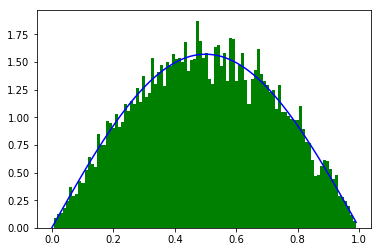

In [26]:
n = 10000 
f =lambda u: (np.arccos(1-2*u))/np.pi #función de densidad
g =lambda x : (np.pi/2)*np.sin(np.pi*x) #curva de probabilidad
u = np.random.uniform(0,1,n) #aleatorios para densidad
f = f(u) #llamando parámetros de f con u.


x=np.arange(0,1,.01) #recta para la curva de probabilidad
plt.hist(f,bins=100,density=True, color= "green")
plt.plot(x,g(x), "b-")
plt.show()

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
![image.png](attachment:image.png)

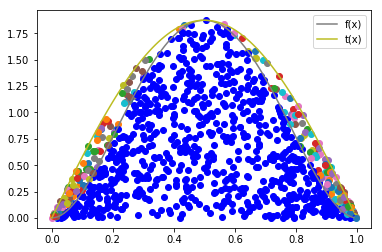

In [28]:
f = lambda x:30*(x**2-2*x**3+x**4)
t = lambda x: 1.875 * np.sin(np.pi*x)
R1 = np.random.rand(N)
R2 = np.random.rand(N)
f_x = f(R1)
t_x = t(R1)
#plt.plot(R1, f_x)
#plt.plot(R1, t_x)

condition = np.multiply(R2,t_x)<=f_x
[plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
        for i in range(len(R1))]

# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

plt.show()

In [5]:
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = np.multiply(R2,t_x)<=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()

El máximo de f es: [1.875]


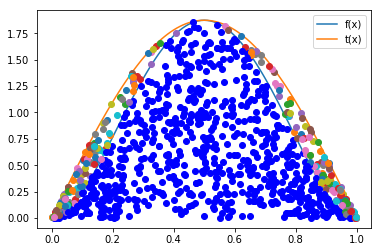

In [6]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) senoidal

# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f * np.sin(np.pi*x) # función constante tx = [a = (max(fx))]* sin(pi*x)

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 1000 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

El máximo de f es: [1.875]


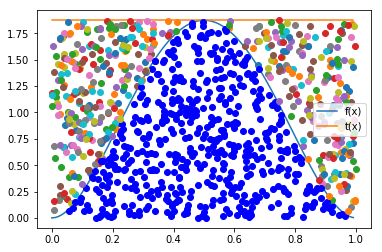

In [29]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante

# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f * np.ones(len(x)) # función constante tx = [a = (max(fx))]* sin(pi*x)

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 1000 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)
Acep_rechazo(R2,R1,f,t)



7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

In [31]:
# Función objetivo 
f = lambda x: 20*x*(1-x)**3
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
max_f

array([2.109375])

El máximo de f es: [2.109375]


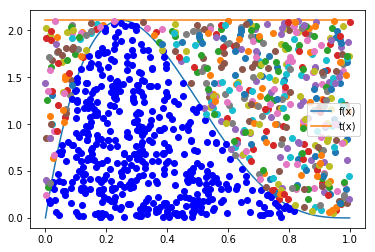

TypeError: cannot unpack non-iterable NoneType object

In [32]:
t = lambda x: max_f*np.ones(len(x)) # función constante
x = np.arange(0,1,0.001)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 1000 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

Prob,X= Acep_rechazo(R2,R1,f,t)